## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

# j'ai utilisé une autre base de données qui est similaire "a cause du taille" le lien : https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

In [1]:
############ imports ##############
import zipfile
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import os
import matplotlib.image as img
from PIL import Image

In [3]:

######## extraction des données ###########
zip_file_path = 'D:/Master_SID/TP/science_D/archive.zip'
extract_path = 'D:/Master_SID/TP/science_D'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [2]:
file="D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database"

print(os.listdir(file))  #### le contenu du fichier  racine

print(os.listdir(os.path.join(file,'data'))) ### c'est le fichier qui contient les données

### print(os.listdir(os.path.join(file,'Normal')))   #### c'est le fichier qui contient les images 

### print(os.listdir(os.path.join(file,'Tuberculosis')))  ##### c'est le fichier qui contient les images tuberculosis


['data', 'data_nettoyer', 'Normal.metadata.xlsx', 'Nouveau Microsoft Access Base de données.accdb', 'README.md.txt', 'Tuberculosis.metadata.xlsx']
['Normal', 'Tuberculosis']


## pour le pre-traitement de données j'ai l'effuctuer sur 3 choses 
### 1 vérifier extension pour supprimer les fichier qui sont pas images 
### 2 vérifier si nous pouvons lire les images sinon on les supprimer 
### 3 les dimensions des images " tous les images doit respecter format de 512*512" sinon je les redimensionner 
## les images traiter sont stocke dans un nouveau repertoir 

## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


In [ ]:
################ nettoyage de données #########
###############################################

########### redimensionner les images sur la taille 512 * 512 #############

from PIL import Image

taille_image_cibler=512  ## en pixel

def Redimensionner(path,taille):
    
    extensions_images = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  ### extension des images 
    
    for dos in os.listdir(path):
        
        dossier=os.path.join(path,dos)
        
        for image in os.listdir(dossier):
            filepath=os.path.join(dossier,image)
            
            ###################################
            extension = os.path.splitext(image)[1].lower()    ##### filtrage selon extension  &&&&&& 
            
            if extension in extensions_images:
                
                try:
                    img = Image.open(filepath)                ##### vérifier si imager est accesible 
                    
                    
                except (IOError, OSError):
                    continue  
            #######################################
            #img = Image.open(filepath)
                if(img != None):
                    width = img.width
                    height = img.height
            
                if(height!=taille_image_cibler or width!=taille_image_cibler):
                
                    img = resizeimage.resize_width(img, taille)
                    img = resizeimage.resize_height(img, taille)
                
                ###### j'ai cree un autre dossier "data_nettoyer" qui contient les meme dossier que "data" pour stocker les images redimensionner
                
            
                    chemain=os.path.join("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data_nettoyer/",dos)
                    chemain=os.path.join(chemain,image)
                    img.save(chemain, img.format)
                
                else:
                
                    chemain=os.path.join("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data_nettoyer/",dos)
                    chemain=os.path.join(chemain,image)
                    img.save(chemain, img.format)
                


############################## appele du fontion #########################################

Redimensionner("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data",taille_image_cibler)

#########################################################################################

## afficher des images 

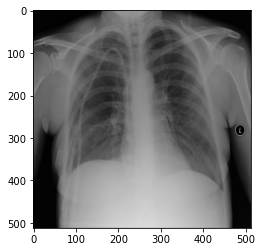

In [3]:

# Your code here for Exploratory Data Analysis (EDA)
image1 = plt.imread('D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Normal/Normal-1.png')
plt.imshow(image1)

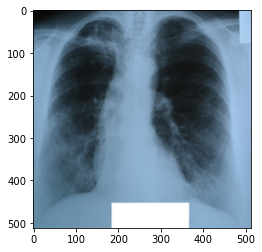

In [4]:

image2 = plt.imread('D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Tuberculosis/Tuberculosis-1.png')
plt.imshow(image2)

### sachant que la base de données avec laquelle j'ai travaillé contient que deux dossier, un des images normale et autre contient des images Tuberculosis  la distrubition que j'ai obtenu ce forme de deux Barre

In [2]:
#########################################################
################ Distribtion des images #################
#########################################################



def distrubtion(path):
    
    dossier_images = path
    extensions_images = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  

    # Compteur pour le nombre d'images
    nombre_images = 0

    
    for fichier in os.listdir(dossier_images):
        if os.path.isfile(os.path.join(dossier_images, fichier)):
        
            extension = os.path.splitext(fichier)[1].lower()       # Vérification de l'extension du fichier
            if extension in extensions_images:
                try:
                    img = Image.open(os.path.join(dossier_images, fichier))
                    img.close()  
                    nombre_images += 1
                except (IOError, OSError):
                    pass  
    return nombre_images


image_normale=distrubtion("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Normal")

image_Tuberculosis=distrubtion("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Tuberculosis")

print(image_normale)
print(image_Tuberculosis)

1176
700


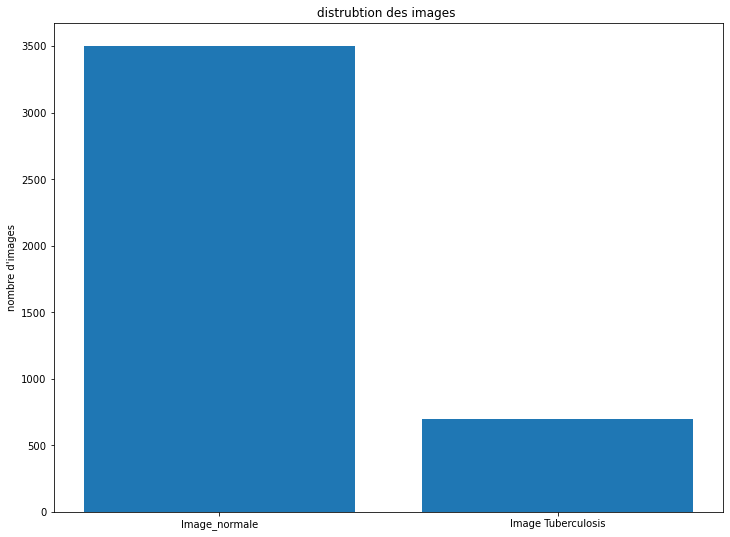

In [6]:
data={"Image_normale":image_normale,"Image Tuberculosis":image_Tuberculosis}


fig,ax=plt.subplots(figsize=(12,9))
ax.bar(data.keys(),data.values());
ax.set(title="distrubtion des images ");
ax.set(ylabel="nombre d'images");


## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


## 1 ere etape entrainer un modele sans prendre en consideration Le problème des données déséquilibrées

In [13]:
data_dir = ("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Normal")
data_dir2 = ("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Tuberculosis")
img2 = os.listdir(data_dir2)
images = os.listdir(data_dir)

In [16]:
data = pd.DataFrame({
    'image_path':[os.path.join(data_dir, filename) for filename in images] + [os.path.join(data_dir2, filename) for filename in img2],
    'class' :["NORMAL"]* len(images) + ["TUBERCOLOSIS"]* len(img2)
})

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    data,
    x_col='image_path',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_datagen.flow_from_dataframe(
    data,
    x_col='image_path',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation'
)

Found 3360 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 2 classes.


In [43]:

# Your code here for Class Imbalance


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(128,128,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import Callback

In [42]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch,logs=None):
        if logs.get('accuracy')>0.8:
            self.model.stop_training =True
            
custom_callback = CustomCallback()

In [27]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    #callbacks=[custom_callback]
)

Epoch 1/10
105/105 [==============================] - 62s 585ms/step - loss: 0.2396 - accuracy: 0.9179
Epoch 2/10
105/105 [==============================] - 63s 602ms/step - loss: 0.2239 - accuracy: 0.9256
Epoch 3/10
105/105 [==============================] - 67s 638ms/step - loss: 0.2119 - accuracy: 0.9312
Epoch 4/10
105/105 [==============================] - 62s 589ms/step - loss: 0.1954 - accuracy: 0.9429
Epoch 5/10
105/105 [==============================] - 63s 594ms/step - loss: 0.2027 - accuracy: 0.9378
Epoch 6/10
105/105 [==============================] - 59s 558ms/step - loss: 0.1908 - accuracy: 0.9476
Epoch 7/10
105/105 [==============================] - 60s 569ms/step - loss: 0.1937 - accuracy: 0.9455
Epoch 8/10
105/105 [==============================] - 63s 596ms/step - loss: 0.1802 - accuracy: 0.9488
Epoch 9/10
105/105 [==============================] - 61s 578ms/step - loss: 0.1653 - accuracy: 0.9542
Epoch 10/10
105/105 [==============================] - 61s 581ms/step - l

In [33]:
len(train_generator)
#y_pred_probs = model.predict(validation_generator)

105

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = train_generator.classes
y_pred_probs = model.predict(train_generator)
y_pred = np.round(y_pred_probs)

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

105/105 [==============================] - 40s 382ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2660
           1       0.19      0.17      0.18       700

    accuracy                           0.67      3360
   macro avg       0.49      0.49      0.49      3360
weighted avg       0.66      0.67      0.67      3360

Confusion Matrix:
 [[2148  512]
 [ 582  118]]


## 2 eme etape entrainer un modele apres le reglage du problème des données déséquilibrées

###  Sous-échantillonnage 

In [42]:

def sous_echantillonnage(path,pourcentage):
    
    
    cont=0
    
        
    for image in os.listdir(path):
            
        cont=cont+1
        
    nombre_a_supprime=round(pourcentage*cont)
    
    
    cont=1 
    for image in os.listdir(path):
        
        filepath=os.path.join(path,image)
        os.remove(filepath)
        if(cont==nombre_a_supprime):
            break
        
        cont=cont+1
        

############################## appele du fontion #########################################

sous_echantillonnage("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Normal",0.4)

#########################################################################################

In [43]:
image_normale=distrubtion("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Normal")

image_Tuberculosis=distrubtion("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Tuberculosis")

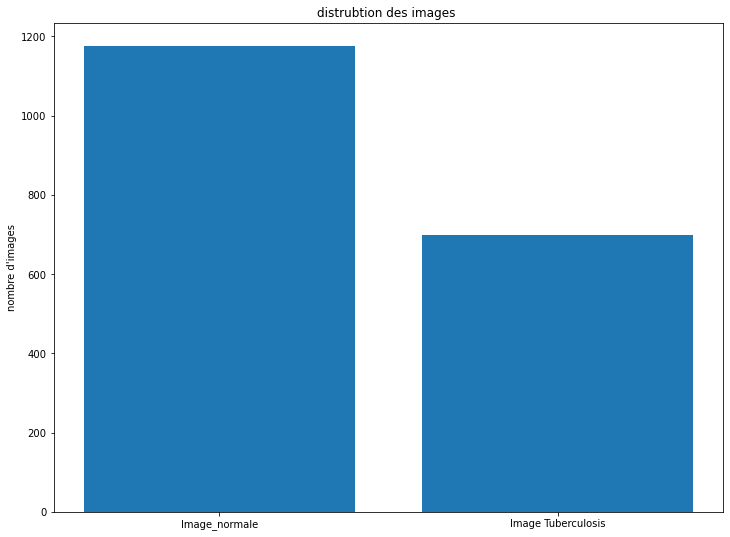

In [44]:
data={"Image_normale":image_normale,"Image Tuberculosis":image_Tuberculosis}


fig,ax=plt.subplots(figsize=(12,9))
ax.bar(data.keys(),data.values());
ax.set(title="distrubtion des images ");
ax.set(ylabel="nombre d'images");

In [37]:
data_dir = ("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Normal")
data_dir2 = ("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Tuberculosis")
img2 = os.listdir(data_dir2)
images = os.listdir(data_dir)

In [38]:
data = pd.DataFrame({
    'image_path':[os.path.join(data_dir, filename) for filename in images] + [os.path.join(data_dir2, filename) for filename in img2],
    'class' :["NORMAL"]* len(images) + ["TUBERCOLOSIS"]* len(img2)
})

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    data,
    x_col='image_path',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_datagen.flow_from_dataframe(
    data,
    x_col='image_path',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation'
)

Found 1764 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 2 classes.


In [49]:
model_2= Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(128,128,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model_2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    #callbacks=[custom_callback]
)

Epoch 1/10
47/47 [==============================] - 31s 630ms/step - loss: 0.6363 - accuracy: 0.6576
Epoch 2/10
47/47 [==============================] - 27s 571ms/step - loss: 0.4180 - accuracy: 0.8075
Epoch 3/10
47/47 [==============================] - 29s 606ms/step - loss: 0.3601 - accuracy: 0.8408
Epoch 4/10
47/47 [==============================] - 26s 554ms/step - loss: 0.3173 - accuracy: 0.8721
Epoch 5/10
47/47 [==============================] - 28s 592ms/step - loss: 0.3117 - accuracy: 0.8661
Epoch 6/10
47/47 [==============================] - 26s 555ms/step - loss: 0.3013 - accuracy: 0.8668
Epoch 7/10
47/47 [==============================] - 27s 564ms/step - loss: 0.2704 - accuracy: 0.8961
Epoch 8/10
47/47 [==============================] - 27s 564ms/step - loss: 0.2661 - accuracy: 0.8954
Epoch 9/10
47/47 [==============================] - 26s 553ms/step - loss: 0.2573 - accuracy: 0.8994
Epoch 10/10
47/47 [==============================] - 26s 555ms/step - loss: 0.2445 - accura

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = train_generator.classes
y_pred_probs = model_2.predict(train_generator)
y_pred = np.round(y_pred_probs)

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

47/47 [==============================] - 17s 355ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.52       801
           1       0.47      0.50      0.48       700

    accuracy                           0.50      1501
   macro avg       0.50      0.50      0.50      1501
weighted avg       0.50      0.50      0.50      1501

Confusion Matrix:
 [[403 398]
 [352 348]]


## Data Augmentation

### Pour cette partie on va verifier l'effet du data augmentation 

In [3]:
######################## tout dabord j'ai definie les different fonction qui ajoute de bruits à les images 
import random

# Ajouter du bruit d'impulsion (salt and pepper noise) et sauvegarder l'image
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    np_image = np.array(image)
    noisy_image = np_image.copy()
    salt = np.random.rand(*np_image.shape) < salt_prob
    pepper = np.random.rand(*np_image.shape) < pepper_prob
    noisy_image[salt] = 255
    noisy_image[pepper] = 0
    return Image.fromarray(noisy_image)

# Ajouter du bruit speckle et sauvegarder l'image
def add_speckle_noise(image, intensity):
    np_image = np.array(image)
    noise = np.random.randn(*np_image.shape) * intensity
    noisy_image = np_image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

# Ajouter du bruit de Poisson et sauvegarder l'image
def add_poisson_noise(image, scale):
    np_image = np.array(image)
    noisy_image = np.random.poisson(np_image / 255.0 * scale) * 255.0 / scale
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

# Ajouter du bruit uniforme et sauvegarder l'image
def add_uniform_noise(image, intensity):
    np_image = np.array(image)
    noise = np.random.uniform(low=-intensity, high=intensity, size=np_image.shape)
    noisy_image = np_image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)


In [19]:

##### Cette fonction requiert en entrée le chemin vers les données sur lesquelles nous souhaitons effectuer le traitement,
##### ainsi que le pourcentage d'images que nous désirons incorporer.

from PIL import Image, ImageFilter
import numpy as np


def data_augmentation(path,pourcentage):
    
    cont=0
    
    for image in os.listdir(path):
            
        cont=cont+1
        
    nombre_a_supprime=round(pourcentage*cont)
    
    cont=1 
    
    traitement={1:"gaussien",2:"salt",3:"speckle",4:"Poisson",5:"uniforme"}
    
    for image in os.listdir(path):
        
        nombre_aleatoire = random.randint(1, 5)  #### Le choix du bruit à ajouter à une image se fera de manière aléatoire. 

        input_image = Image.open(os.path.join(path, image))  ### lire image 
        
        
        image="bruit"+image
        
        if(traitement[nombre_aleatoire]=="gaussien"):
            
            noisy_image = input_image.filter(ImageFilter.GaussianBlur(radius=2))
            noisy_image.save(os.path.join(path, image))
            
        elif(traitement[nombre_aleatoire]=="salt"):
            
            noisy_image = add_salt_and_pepper_noise(input_image, salt_prob=0.01, pepper_prob=0.01)
            noisy_image.save(os.path.join(path, image))
            
        elif(traitement[nombre_aleatoire]=="speckle"):
            
            noisy_image = add_speckle_noise(input_image, intensity=30)
            noisy_image.save(os.path.join(path, image))
            
        elif(traitement[nombre_aleatoire]=="Poisson"):
          
            noisy_image = add_poisson_noise(input_image, scale=10)
            noisy_image.save(os.path.join(path, image))
            
        else:
            
            noisy_image = add_uniform_noise(input_image, intensity=20)
            noisy_image.save(os.path.join(path, image))
        


In [30]:
data_augmentation("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Tuberculosis",0.1)

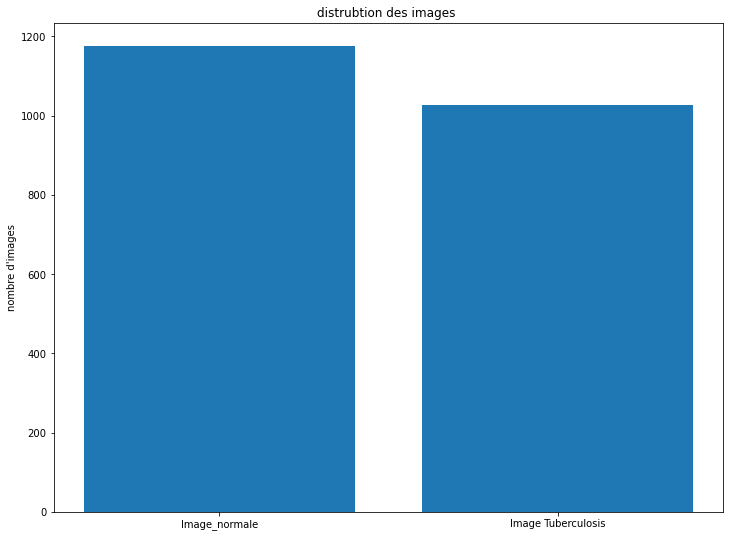

In [36]:
image_normale=distrubtion("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Normal")

image_Tuberculosis=distrubtion("D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Tuberculosis")


data={"Image_normale":image_normale,"Image Tuberculosis":image_Tuberculosis}


fig,ax=plt.subplots(figsize=(12,9))
ax.bar(data.keys(),data.values());
ax.set(title="distrubtion des images ");
ax.set(ylabel="nombre d'images");

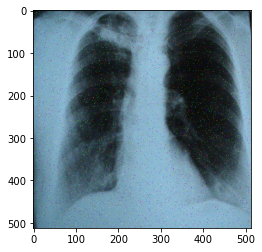

In [35]:
##### affichage d'une image bruite

image2 = plt.imread('D:/Master_SID/TP/science_D/TB_Chest_Radiography_Database/data/Tuberculosis/bruitTuberculosis-2.png')
plt.imshow(image2)

In [44]:
####### entrainer le modele 

model_3= Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(128,128,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model_3.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    #callbacks=[custom_callback]
)

Epoch 1/10
56/56 [==============================] - 33s 568ms/step - loss: 0.7622 - accuracy: 0.5539
Epoch 2/10
56/56 [==============================] - 30s 534ms/step - loss: 0.5514 - accuracy: 0.6372
Epoch 3/10
56/56 [==============================] - 30s 542ms/step - loss: 0.4775 - accuracy: 0.8175
Epoch 4/10
56/56 [==============================] - 30s 532ms/step - loss: 0.4541 - accuracy: 0.8532
Epoch 5/10
56/56 [==============================] - 30s 539ms/step - loss: 0.4240 - accuracy: 0.8628
Epoch 6/10
56/56 [==============================] - 30s 542ms/step - loss: 0.3977 - accuracy: 0.8770
Epoch 7/10
56/56 [==============================] - 30s 529ms/step - loss: 0.2939 - accuracy: 0.8776
Epoch 8/10
56/56 [==============================] - 30s 534ms/step - loss: 0.2907 - accuracy: 0.8753
Epoch 9/10
56/56 [==============================] - 30s 534ms/step - loss: 0.2725 - accuracy: 0.8929
Epoch 10/10
56/56 [==============================] - 32s 568ms/step - loss: 0.2532 - accura

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = train_generator.classes
y_pred_probs = model_3.predict(train_generator)
y_pred = np.round(y_pred_probs)

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

56/56 [==============================] - 19s 334ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.45      0.43       736
           1       0.57      0.52      0.54      1028

    accuracy                           0.49      1764
   macro avg       0.49      0.49      0.49      1764
weighted avg       0.50      0.49      0.50      1764

Confusion Matrix:
 [[334 402]
 [493 535]]
